# Experiment Tutorial

In [1]:
import sys
sys.path.insert(0, '/home/hongky/project/model_compress/shrinkbench/')
from experiment import PruningExperiment
import pruning
# import importlib
# importlib.reload(pruning)

The `DATAPATH` and `WEIGHTSPATH` environment variables are used to tell the framework where to look for datasets and pretrained weights respectively.

In [2]:
import os
os.environ['DATAPATH'] = '/home/hongky/project/model_compress/shrinkbench/data/'
#os.environ['WEIGHTSPATH'] = '/home/kylee/work/projects/7_model_compress/2_shrinkbench/pretrained/mnist/mnistnet.pt'

In [5]:
import torchvision
root = '/home/hongky/project/model_compress/shrinkbench/data'
torchvision.datasets.MNIST(os.environ['DATAPATH'], train=True, transform=None, target_transform=None, download=True)

Extracting /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw/train-images-idx3-ubyte.gz to /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw


Extracting /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw




Extracting /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw


Extracting /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/kylee/work/projects/7_model_compress/2_shrinkbench/data
    Split: Train

In [3]:
from IPython.display import clear_output
clear_output()

In [5]:
import pathlib
import pydantic.json

pydantic.json.ENCODERS_BY_TYPE[pathlib.PosixPath] = str
pydantic.json.ENCODERS_BY_TYPE[pathlib.WindowsPath] = str


from experiment import TrainingExperiment
run_path = '/home/hongky/project/model_compress/shrinkbench/pretrained/mnist'
p = pathlib.Path(run_path)
train_exp = TrainingExperiment(
                        dataset='MNIST', 
                        model='MnistNet', 
                        path=run_path, 
                        train_kwargs={'epochs':11}
                        )
train_exp.run()



Found MNIST under /home/hongky/project/model_compress/shrinkbench/data/MNIST
Found MNIST under /home/hongky/project/model_compress/shrinkbench/data/MNIST
Running {
    "save_freq": 10,
    "resume_optim": false,
    "resume": null,
    "pretrained": false,
    "debug": false,
    "train_kwargs": {
        "optim": "SGD",
        "epochs": 11,
        "lr": 0.001
    },
    "dl_kwargs": {
        "batch_size": 128,
        "pin_memory": false,
        "num_workers": 8
    },
    "path": "/home/hongky/project/model_compress/shrinkbench/pretrained/mnist",
    "seed": 42,
    "model": "MnistNet",
    "dataset": "MNIST"
}
Logging results to /home/hongky/project/model_compress/shrinkbench/pretrained/mnist
Type-path:: <class 'str'>


Train Epoch 0/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 0


Train Epoch 1/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 1


Train Epoch 2/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 2


Train Epoch 3/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 3


Train Epoch 4/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 4


Train Epoch 5/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 5


Train Epoch 6/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 6


Train Epoch 7/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 7


Train Epoch 8/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 8


Train Epoch 9/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 9


Train Epoch 10/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 10


Val Epoch 10/11: 100%|██████████| 79/79 [00:00<00:00, 119.77it/s, loss=0.000367, top1=0.975, top5=0.989]


In [6]:
import torch 
save_model_path = '/home/hongky/project/model_compress/shrinkbench/pretrained/mnist/mnistnet.pt'
torch.save(train_exp.model.state_dict(), save_model_path)

We run experiments for our MNIST network for logarithmically spaced compression ratios

In [8]:
model_path = '/home/hongky/project/model_compress/shrinkbench/jupyter/results/'
#os.environ['WEIGHTSPATH'] = model_path
for strategy in ['RandomPruning', 'GlobalMagWeight', 'LayerMagWeight']:
    for  c in [1,2,4,8,16,32,64]:
        exp = PruningExperiment(dataset='MNIST', 
                                model='MnistNet',
                                strategy=strategy,
                                compression=c,
                                path=model_path + '_' + strategy + '_' + str(c),
                                train_kwargs={'epochs':11})
        clear_output()
        exp.run()
        

Running {
    "save_freq": 10,
    "resume_optim": false,
    "resume": null,
    "pretrained": true,
    "debug": false,
    "train_kwargs": {
        "optim": "SGD",
        "epochs": 11,
        "lr": 0.001
    },
    "dl_kwargs": {
        "batch_size": 128,
        "pin_memory": false,
        "num_workers": 8
    },
    "path": "/home/hongky/project/model_compress/shrinkbench/jupyter/results/_LayerMagWeight_64",
    "seed": 42,
    "model": "MnistNet",
    "dataset": "MNIST",
    "strategy": "LayerMagWeight",
    "compression": 64
}
Logging results to /home/hongky/project/model_compress/shrinkbench/jupyter/results/_LayerMagWeight_64
Type-path:: <class 'str'>


Train Epoch 0/11:   0%|          | 0/469 [00:00<?, ?it/s]

{
    "size": 431080,
    "size_nz": 6741,
    "compression_ratio": 63.94896899569797,
    "flops": 4397000,
    "flops_nz": 23661.0,
    "theoretical_speedup": 185.83322767423186,
    "loss": 0.017922082491501977,
    "val_acc1": 0.10878164556962025,
    "val_acc5": 0.6607001582278479
}
  module   param        comp    size           shape  prunable
0  conv1  weight  166.666665     500   (20, 1, 5, 5)      True
1  conv1    bias   20.000000      20           (20,)      True
2  conv2  weight  245.098047   25000  (50, 20, 5, 5)      True
3  conv2    bias   50.000001      50           (50,)      True
4    fc1  weight  246.761272  400000      (500, 800)      True
5    fc1    bias  166.666665     500          (500,)      True
6    fc2  weight    1.000000    5000       (10, 500)     False
7    fc2    bias    1.000000      10           (10,)     False
Start epoch 0


Train Epoch 1/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 1


Train Epoch 2/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 2


Train Epoch 3/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 3


Train Epoch 4/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 4


Train Epoch 5/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 5


Train Epoch 6/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 6


Train Epoch 7/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 7


Train Epoch 8/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 8


Train Epoch 9/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 9


Train Epoch 10/11:   0%|          | 0/469 [00:00<?, ?it/s]

Start epoch 10


Val Epoch 10/11: 100%|██████████| 79/79 [00:00<00:00, 83.29it/s, loss=0.00207, top1=0.908, top5=0.985]


We then collect output from experiment folders and plot the diferent metrics easily

In [5]:
from plot import df_from_results, plot_df

In [9]:
result_path = '/home/hongky/project/model_compress/shrinkbench/jupyter/results'
df = df_from_results(result_path)

With the provided functions, it is easy to generate plots 

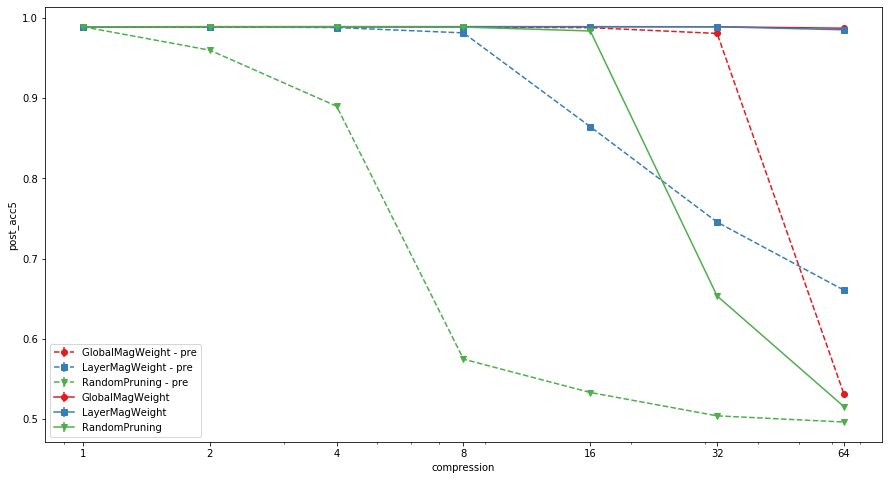

In [10]:
plot_df(df, 'compression', 'pre_acc5', markers='strategy', line='--', colors='strategy', suffix=' - pre')
plot_df(df, 'compression', 'post_acc5', markers='strategy', fig=False, colors='strategy')

We can also check the theoretical speedup and see that layerwise provides larger FLOPS speedups because of the even pruning of the conv layers

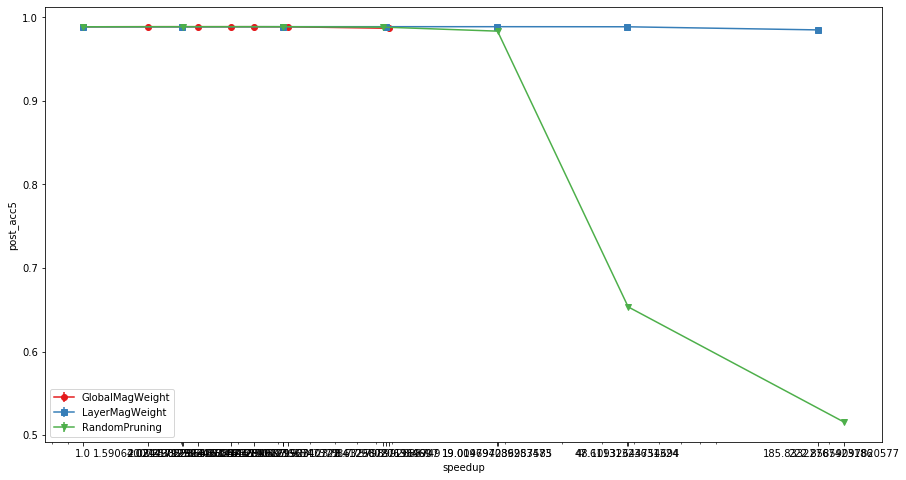

In [11]:
from matplotlib import pyplot as plt
import numpy as np
plot_df(df, 'speedup', 'post_acc5', colors='strategy', markers='strategy')
# plt.yscale('log')
# plt.ylim(0.996,0.9995)
# plt.xticks(2**np.arange(7))
# plt.gca().set_xticklabels(map(str, 2**np.arange(7)))
# None

We can easily check if the compression is matching our expectation by looking at the relative error. As expected, random pruning does worst.

In [12]:
df['compression_err'] = (df['real_compression'] - df['compression'])/df['compression']

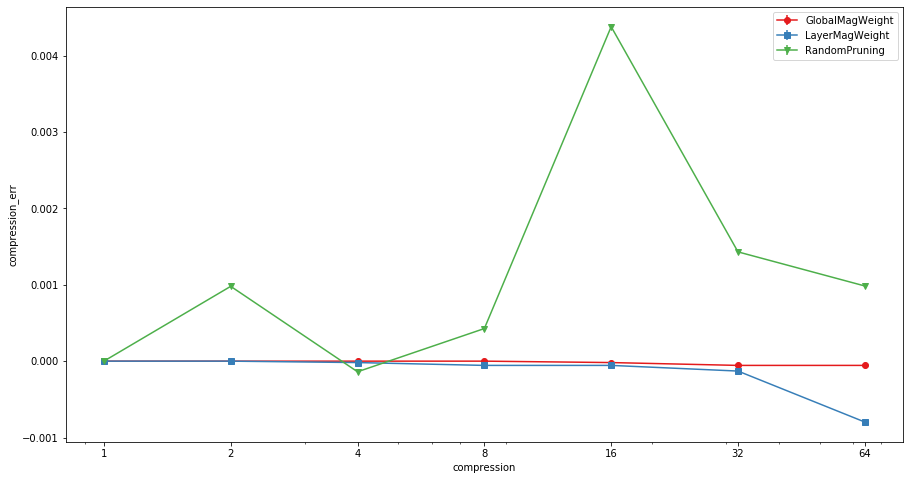

In [13]:
plot_df(df, 'compression', 'compression_err', colors='strategy', markers='strategy')